In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from tqdm import tqdm_notebook

In [2]:
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv")

# EDA

## 1. 대출상품결과(loan_result)

In [3]:
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [4]:
loan_result = loan_result[(-loan_result["loan_limit"].isna()) & (-loan_result["loan_rate"].isna())]

In [5]:
#중복 데이터 존재 -> 제거해야할듯 -> 안해도 된대
loan_result[loan_result.duplicated()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
1507095,2160853,2022-06-16 09:47:23,10,65,29000000.0,15.6,NaN
2292642,662921,2022-06-14 12:20:50,10,65,19000000.0,15.6,NaN
2453028,361861,2022-03-10 09:16:08,10,65,36000000.0,12.2,1.0
2656633,124917,2022-03-01 18:41:01,10,65,50000000.0,12.2,1.0
3026732,893666,2022-06-21 10:34:14,10,65,34000000.0,12.7,NaN
3081480,1008438,2022-06-21 14:50:56,22,221,3000000.0,18.4,NaN
3681411,176009,2022-03-14 15:04:55,10,65,31000000.0,12.2,1.0
5455325,424582,2022-06-13 10:56:40,10,65,43000000.0,14.2,NaN
5550899,707257,2022-06-27 09:03:12,10,65,50000000.0,12.7,NaN
6231370,43839,2022-03-22 13:10:59,10,65,28000000.0,12.5,1.0


In [6]:
loan_result["loan_limit"] += 250000

<ipython-input-6-792e47fd35af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_result["loan_limit"] += 250000


## 2. 유저로그데이터(log_data)

In [7]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [8]:
log_data.isna().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

## 3. 유저스펙테이블(user_spec)

In [9]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


데이터 전체 행 수 : 1,394,216

In [10]:
len(user_spec)

1394216

application_id(신청서) 수 : 1,394,216 ( == 데이터 전체 행 수)

In [11]:
len(user_spec["application_id"].unique())

1394216

user_id(이용자) 수 : 405,213\
 => 평균적으로 이용자 한 명당 약 3번 정도 핀다 신청을 함

In [12]:
len(user_spec["user_id"].unique())

405213

### loan_result에는 있지만 user_spec에는 없는 경우

**loan_result의 "application_id"와 user_spec의 "application_id"를 기준으로 merge**

In [6]:
loan_spec = pd.merge(loan_result,user_spec, how='left',on='application_id')

In [7]:
# 이 중에서 user_id가 결측인 값 => loan_result에 있는 application_id가 user_spec에는 없었다.
# 없음
loan_spec[loan_spec["user_id"].isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


### 날짜 형식 맞춰주기

In [13]:
# company_enter_month
company_enter_month_d = []
for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):
    try:
        company_enter_month_d.append(pd.to_datetime(i[0:6]+"01"))
    except:
        company_enter_month_d.append(np.nan)

<ipython-input-13-ea4bc05fa1fd>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):


  0%|          | 0/1394216 [00:00<?, ?it/s]

In [14]:
user_spec["company_enter_month"] = company_enter_month_d

In [15]:
# insert_time
user_spec["insert_time"] = pd.to_datetime(user_spec["insert_time"])

### 신용점수

In [19]:
tmp = user_spec[user_spec["credit_score"].isna()]
tmp

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaT,기타,전월세,30000000.0,사업자금,0.0,NaN,1.0,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
64,1036265,558745,1986.0,0.0,2022-06-07 17:20:08,NaN,48000000.0,EARNEDINCOME,2012-10-01,정규직,자가,280000000.0,주택구입,0.0,NaN,NaN,NaN
65,1930194,157472,1995.0,1.0,2022-06-07 16:34:09,NaN,40000000.0,EARNEDINCOME,2022-05-01,정규직,기타가족소유,7000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394120,1281112,493197,1987.0,1.0,2022-03-22 12:06:34,NaN,100000000.0,PRIVATEBUSINESS,2021-10-01,정규직,기타가족소유,50000000.0,사업자금,NaN,NaN,NaN,NaN
1394127,1121565,82805,1992.0,1.0,2022-03-22 11:42:39,NaN,30000000.0,EARNEDINCOME,2018-01-01,정규직,전월세,10000000.0,LIVING,NaN,NaN,NaN,NaN
1394141,1229782,250565,1989.0,1.0,2022-03-22 21:12:37,NaN,44000000.0,EARNEDINCOME,2018-04-01,정규직,전월세,20000000.0,기타,NaN,NaN,NaN,NaN
1394179,1264282,10298,1999.0,1.0,2022-03-22 14:31:24,NaN,10000000.0,FREELANCER,2021-06-01,기타,기타가족소유,3000000.0,전월세보증금,NaN,NaN,NaN,NaN


In [20]:
tmp.value_counts("employment_type")

employment_type
정규직    63748
기타     32630
계약직     7690
일용직     1044
dtype: int64

### purpose 명칭 통합

In [9]:
user_spec["purpose"].value_counts()

생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64

In [16]:
user_spec["purpose"].replace("LIVING", "생활비", inplace = True)
user_spec["purpose"].replace("SWITCHLOAN", "대환대출", inplace = True)
user_spec["purpose"].replace("BUSINESS", "사업자금", inplace = True)
user_spec["purpose"].replace("ETC", "기타", inplace = True)
user_spec["purpose"].replace("HOUSEDEPOSIT", "전월세보증금", inplace = True)
user_spec["purpose"].replace("BUYHOUSE", "주택구입", inplace = True)
user_spec["purpose"].replace("INVEST", "투자", inplace = True)
user_spec["purpose"].replace("BUYCAR", "자동차구입", inplace = True)

In [10]:
user_spec["purpose"].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

### income_type, employment_type, houseown_type 비율

In [21]:
user_spec["income_type"].value_counts()

EARNEDINCOME       892579
OTHERINCOME        172600
PRIVATEBUSINESS    126108
FREELANCER         103913
EARNEDINCOME2       78806
PRACTITIONER        20125
Name: income_type, dtype: int64

In [22]:
user_spec["employment_type"].value_counts()

정규직    918032
기타     345801
계약직    111445
일용직     18853
Name: employment_type, dtype: int64

In [23]:
user_spec["houseown_type"].value_counts()

전월세       642838
기타가족소유    465893
자가        283454
배우자         1946
Name: houseown_type, dtype: int64

In [18]:
user_spec["purpose"].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

### existing_loan_cnt, existing_loan_amt

In [25]:
user_spec[user_spec["existing_loan_cnt"].isna()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [26]:
user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [27]:
user_spec[(-user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["existing_loan_cnt"].value_counts()

1.0    115218
Name: existing_loan_cnt, dtype: int64

In [28]:
user_spec[user_spec["existing_loan_amt"] == 0]["existing_loan_cnt"].value_counts()

1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
6.0        1
5.0        1
9.0        1
Name: existing_loan_cnt, dtype: int64

# 결측치 대체

## user_spec

### 출생년도, 성별 결측치 대체

In [17]:
for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):
    user_spec.loc[i,"birth_year"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"birth_year"].mean()
    user_spec.loc[i,"gender"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"gender"].mean()

user_spec.isna().sum()

<ipython-input-17-50dd04275f99>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):


  0%|          | 0/12961 [00:00<?, ?it/s]

application_id                               0
user_id                                      0
birth_year                                9724
gender                                    9724
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

대체할 수 없는 출생년도와 성별은 대체보단 범주화

<AxesSubplot:>

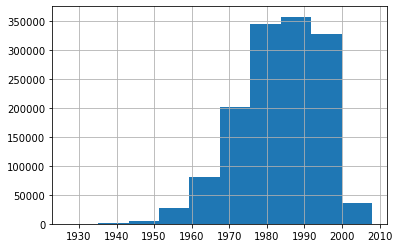

In [30]:
user_spec["birth_year"].hist()

In [18]:
user_spec["only_age"] = 2022 - user_spec["birth_year"]

**만으로 청소년(13-18세), 청년(19-29세), 중년(30-49세), 장년(50-64세), 노년(65세 이상)**

In [19]:
user_spec["cat_age"] =  pd.cut(user_spec["only_age"],[12,18, 29, 49, 64,100], right=False, labels=['청소년', '청년', '중년', '장년', '노년']).astype(object)
user_spec["cat_age"]

0          중년
1          장년
2          청년
3          중년
4          청년
           ..
1394211    청년
1394212    노년
1394213    중년
1394214    중년
1394215    중년
Name: cat_age, Length: 1394216, dtype: object

In [20]:
user_spec.loc[user_spec["cat_age"].isna(),"cat_age"] = "Missing_age"

In [21]:
user_spec["cat_gender"] = "Missing_gender"
user_spec.loc[user_spec["gender"] == 1,"cat_gender"] = "남성"
user_spec.loc[user_spec["gender"] == 0,"cat_gender"] = "여성"

나이 성별 범주화 완료

### 청소년 제거
어차피 loan_result에 없음!

In [22]:
user_spec = user_spec[-(user_spec["cat_age"] == "청소년")]

### 개인정보(yearly_income, income_type, employment_type, houseown_type, desired_amount, purpose) 결측치 대체

In [37]:
#income_type, employment_type, houseown_type, desired_amount, purpose 결측 85개
#yearly_income 결측 85개
user_info_na = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]
user_info_na

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0,48.0,중년,남성
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0,26.0,청년,남성
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0,26.0,청년,여성
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,중년,여성
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,29.0,중년,남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0,57.0,장년,남성
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0,27.0,청년,남성
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0,38.0,중년,남성
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0,50.0,장년,남성


**- 위의 85개 경우는 전부 loan_result에 없는 application_id 이다.**

In [38]:
l_list = []
for i in user_info_na["application_id"]:
    l_list.append(len(loan_result[loan_result["application_id"] == i]))

In [39]:
np.unique(l_list)

array([0])

따라서 삭제가 적절하다고 판단

#### yearly_income만 결측인 경우

In [40]:
# yearly_income만 결측인 값 5개
user_spec[(-user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaT,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN,27.0,청년,남성
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,2022-06-01,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0,27.0,청년,남성
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0,26.0,청년,여성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaT,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0,19.0,청년,남성


- 전부 6월 30일에 생성되었다는 특징이 있음, 이유는 발견 못함 -> 데이터를 잘라오면서 생긴 문제일 수 있음 QNA 20일 4번

- application_id : 341149 만 loan_result에 행이 존재

In [41]:
loan_result[loan_result["application_id"] == 341149]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
4495392,341149,2022-06-30 21:32:20,64,254,45000000.0,10.3,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35000000.0,16.4,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5000000.0,19.5,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15000000.0,12.5,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10000000.0,9.1,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23000000.0,15.4,NaN


#### 제거

yearly_income 기준 삭제
 - 그 전에 application_id 341149는 같은 user_id인 신청서가 존재하고 yearly_income이 0으로 적혀있었기 때문에 대체

In [42]:
user_spec[user_spec["user_id"] == 670502]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
566158,1746224,670502,1981.0,1.0,2022-06-30 22:41:11,930.0,0.0,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성


In [23]:
#같은 user의 다른 application을 이용하여 대체, 생성일시를 제외한 모든 조건이 동일하기 때문에 연소득 대체 가능하다고 판단
user_spec.loc[user_spec["application_id"] == 341149, "yearly_income"] = user_spec.loc[user_spec["user_id"] == 670502,"yearly_income"].mean()

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [24]:
#연소득 기준 결측인 행 삭제
user_spec = user_spec[-user_spec["yearly_income"].isna()]

### 입사년도 결측치 대체
입사년도 - 출생년도 : 몇 살에 입사를 했는가

생선년도 - 입사년도 : 입사한지 얼마나 지났는가 ( = 경력)

Quantile을 이용해 범주화

In [25]:
user_spec["aft_enter_time"] = (user_spec["insert_time"] - user_spec["company_enter_month"]).dt.days / 365

user_spec["cat_aft_enter_time"] =  pd.cut(user_spec["aft_enter_time"],
                                          [user_spec["aft_enter_time"].describe()["min"],
                                           user_spec["aft_enter_time"].describe()["25%"],
                                           user_spec["aft_enter_time"].describe()["50%"],
                                           user_spec["aft_enter_time"].describe()["75%"],
                                           user_spec["aft_enter_time"].describe()["max"]+1], right=False, labels=['0~25','25~50', '50~75','75~100']).astype(object)

user_spec["cat_aft_enter_time"] = user_spec["cat_aft_enter_time"].fillna("cat_aft_enter_NA")

In [26]:
user_spec["bef_enter_time"] = (user_spec["company_enter_month"].dt.year - user_spec["birth_year"])

user_spec["cat_bef_enter_time"] =  pd.cut(user_spec["bef_enter_time"],
                                          [user_spec["bef_enter_time"].describe()["min"],
                                           user_spec["bef_enter_time"].describe()["25%"],
                                           user_spec["bef_enter_time"].describe()["50%"],
                                           user_spec["bef_enter_time"].describe()["75%"],
                                           user_spec["bef_enter_time"].describe()["max"]+1], right=False, labels=['0~25','25~50', '50~75','75~100']).astype(object)

user_spec["cat_bef_enter_time"] = user_spec["cat_bef_enter_time"].fillna("cat_bef_enter_NA")

In [23]:
user_spec.value_counts(["cat_bef_enter_time","cat_aft_enter_time"]).reset_index()

,cat_bef_enter_time,cat_aft_enter_time,0
0,cat_bef_enter_NA,cat_aft_enter_NA,171623
1,75~100,25~50,90929
2,25~50,75~100,90184
3,75~100,50~75,89814
4,50~75,50~75,88934
5,0~25,75~100,85008
6,25~50,0~25,83215
7,75~100,0~25,82461
8,50~75,25~50,76671
9,50~75,75~100,76355


### personal_rehabilitation_yn, personal_rehabilitation_complete_yn

- 개인 회생자 신청 여부(0:개인회생자 X, 1:개인회생자O)
- 개인 회생 완료 여부(personal_rehabilitation_yn == 1인 사람들 중, 0:납입중, 1:완료)

4월18일에 개인회생자 전용 대출이 생김

4월18일 이전 데이터에서는 전부 (NA, NA)

상식적으로 존재 가능한 경우의 수 : (0,NA), (1,0), (1,1)

이상값인 0,0 or 0,1 는 아마도 개인회생자 여부를 체크 한 후, 다시 해제한 경우일 가능성이 있음!

-> 그렇다면 전부 0, NA로 대체하는 것이 옳음

In [27]:
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna()), "personal_rehabilitation_complete_yn"] = np.nan

In [28]:
print("NA,NA : ", user_spec[(user_spec["personal_rehabilitation_yn"].isna()) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

NA,NA :  (587360, 24)
1,NA : (0, 24)
1,0 or 1,1 : (12705, 24)
0,NA : (794005, 24)
0,0 or 0,1 : (0, 24)


**개인회생 관련 변수를 하나의 변수로 범주화**

In [29]:
user_spec["rehabilitation"] = "rehabilitation_not"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 0),"rehabilitation"] = "rehabilitation"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 1),"rehabilitation"] = "rehabilitation_completed"
user_spec.loc[(user_spec["personal_rehabilitation_yn"].isna()) & (user_spec["personal_rehabilitation_complete_yn"].isna()),"rehabilitation"] = "rehabilitation_NA"

rehabilitation_not : 개인회생자가 아님\
rehabilitation : 개인회생자이며, 납입중임\
rehabilitation_completed : 개인회생자이며, 납입 완료했음\
rehabilitation_NA : 아마도 앱 버전의 이유로 선택란이 없었을 것. 즉, 알 수 없음

In [22]:
user_spec["rehabilitation"].value_counts()

rehabilitation_not          794005
rehabilitation_NA           587360
rehabilitation               11358
rehabilitation_completed      1347
Name: rehabilitation, dtype: int64

### existing_loan_cnt, existing_loan_amt 결측치 대체

먼저, 기대출 횟수, 잔액이 변동된 경우는 없다.

In [ ]:
user_loan_amt_min = user_spec.groupby("user_id").min()["existing_loan_amt"]
user_loan_amt_max = user_spec.groupby("user_id").max()["existing_loan_amt"]
user_loan_amt_min[user_loan_amt_min != user_loan_amt_max].max()

In [ ]:
user_loan_cnt_min = user_spec.groupby("user_id").min()["existing_loan_cnt"]
user_loan_cnt_max = user_spec.groupby("user_id").max()["existing_loan_cnt"]
user_loan_cnt_min[user_loan_cnt_min != user_loan_cnt_max].max()

#### 기대출 횟수와 잔액의 NA여부를 바탕으로 그룹 형성

- 횟수가 0인 경우는 없음
- 잔액이 NA인 경우는 횟수가 NA또는 1
- 잔액이 0인 경우 존재

NA NA : 대출 경험 없음

1 NA : 이상값

!NA 0 : 이상값

!NA !NA : 기대출 보유자

In [54]:
loan_na_na = user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_na_na.value_counts("existing_loan_cnt")

Series([], dtype: int64)

In [55]:
loan_notna_na = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_notna_na.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0    115187
dtype: int64

In [56]:
loan_notna_notna = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (-user_spec["existing_loan_amt"].isna())]
loan_notna_notna.value_counts("existing_loan_cnt")

existing_loan_cnt
3.0      155923
2.0      145538
4.0      144384
1.0      126369
5.0      124044
          ...  
81.0          1
169.0         1
176.0         1
71.0          1
67.0          1
Length: 100, dtype: int64

In [57]:
loan_notna_0 = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"]==0)]
loan_notna_0.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
9.0        1
6.0        1
5.0        1
dtype: int64

#### <가설>
가설) !NA, 0인 값들은 기대출 잔액이 50만원보다 적어서 반올림 결과 0이 된 것이다.

가설) 1, NA인 값들은 대출 무경험자와, 대출 완납 경험자를 구분하기 위한 것이다. 즉, 1, NA는 완납 경험자이다. -> 그렇다면 집단 간 신용점수에 차이가 있을 것!

#### 그룹 간의 신용 점수에서 차이를 보였다.

In [59]:
loan_na_na["credit_score"].describe()

count    121232.000000
mean        665.470998
std         159.270887
min          60.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [60]:
loan_notna_na["credit_score"].describe()

count    112818.000000
mean        653.847081
std         160.652877
min         100.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [61]:
loan_notna_0["credit_score"].describe()

count    4988.000000
mean      722.082999
std       196.428333
min       100.000000
25%       610.000000
50%       730.000000
75%       880.000000
max      1000.000000
Name: credit_score, dtype: float64

In [62]:
loan_notna_notna["credit_score"].describe()

count    1.054966e+06
mean     6.336904e+02
std      1.152173e+02
min      9.000000e+01
25%      5.700000e+02
50%      6.200000e+02
75%      6.800000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

**집단 별 신용 점수 차이 검정**

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
#집단 크기 확인
loan_notna_na_c_score = loan_notna_na["credit_score"]
loan_notna_notna_c_score = loan_notna_notna["credit_score"]
loan_na_na_c_score = loan_na_na["credit_score"]
loan_notna_0_c_score = loan_notna_0["credit_score"]
print("<size>")
print("(!NA, NA) : ", len(loan_notna_na_c_score))
print("(!NA, !NA) : ", len(loan_notna_notna_c_score))
print("(NA, NA) : ", len(loan_na_na_c_score))
print("(!NA, 0) : ", len(loan_notna_0_c_score))

<size>
(!NA, NA) :  115187
(!NA, !NA) :  1080376
(NA, NA) :  198507
(!NA, 0) :  5130


Text(0.5, 1.0, '!NA,0')

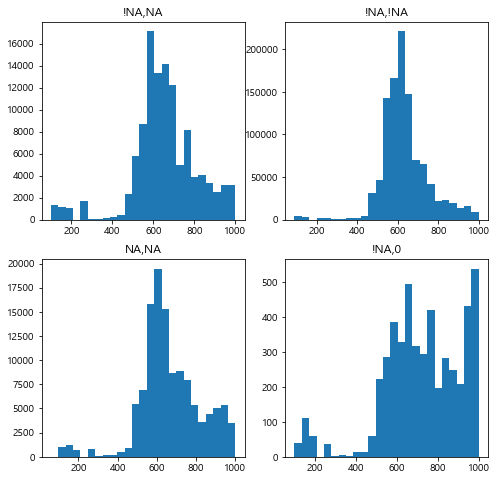

In [64]:
#정규성 확인 hist
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.hist(loan_notna_na_c_score,bins=25)
plt.title("!NA,NA")
plt.subplot(2,2,2)
plt.hist(loan_notna_notna_c_score,25)
plt.title("!NA,!NA")
plt.subplot(2,2,3)
plt.hist(loan_na_na_c_score,bins=25)
plt.title("NA,NA")
plt.subplot(2,2,4)
plt.hist(loan_notna_0_c_score,bins=25)
plt.title("!NA,0")

정규성검정 1 : Shapiro test

 - 전부 기각 (= 정규성을 만족하지 않음)

In [65]:
import scipy.stats as stats
from scipy.stats import shapiro
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",shapiro(loan_notna_na_c_score))
print("!NA,!NA : ",shapiro(loan_notna_notna_c_score))
print("NA,NA : ",shapiro(loan_na_na_c_score))
print("!NA,0 : ",shapiro(loan_notna_0_c_score))

H0 : 정규성을 충족한다
!NA,NA :  ShapiroResult(statistic=nan, pvalue=1.0)
!NA,!NA :  ShapiroResult(statistic=nan, pvalue=1.0)
NA,NA :  ShapiroResult(statistic=nan, pvalue=1.0)
!NA,0 :  ShapiroResult(statistic=nan, pvalue=1.0)


정규성검정 2 : D’Agostino’s K^2 Test

In [80]:
from scipy.stats import normaltest
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",normaltest(loan_notna_na_c_score))
print("!NA,!NA : ",normaltest(loan_notna_notna_c_score))
print("NA,NA : ",normaltest(loan_na_na_c_score))
print("!NA,0 : ",normaltest(loan_notna_0_c_score))

H0 : 정규성을 충족한다
!NA,NA :  NormaltestResult(statistic=nan, pvalue=nan)
!NA,!NA :  NormaltestResult(statistic=nan, pvalue=nan)
NA,NA :  NormaltestResult(statistic=nan, pvalue=nan)
!NA,0 :  NormaltestResult(statistic=nan, pvalue=nan)


정규성검정 3 : Kolmogorove-Smirnov test

In [81]:
from scipy.stats import kstest
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",kstest(loan_notna_na_c_score, "norm"))
print("!NA,!NA : ",kstest(loan_notna_notna_c_score, "norm"))
print("NA,NA : ",kstest(loan_na_na_c_score, "norm"))
print("!NA,0 : ",kstest(loan_notna_0_c_score, "norm"))

H0 : 정규성을 충족한다
!NA,NA :  KstestResult(statistic=nan, pvalue=nan)
!NA,!NA :  KstestResult(statistic=nan, pvalue=nan)
NA,NA :  KstestResult(statistic=nan, pvalue=nan)
!NA,0 :  KstestResult(statistic=nan, pvalue=nan)


결론 : 4개의 집단 모두 정규성을 만족하지 않음.
    
--> 비모수적 방법인 맨 휘트니 U test(우측검정)사용

In [83]:
#맨휘트니 U test
from scipy.stats import mannwhitneyu
print("(!NA,NA) vs (!NA,!NA) : ",mannwhitneyu(loan_notna_na_c_score, loan_notna_notna_c_score, alternative='greater'))
#(!NA,NA) > (!NA,!NA)

print("(NA,NA) vs (!NA,NA) : ",mannwhitneyu(loan_na_na_c_score, loan_notna_na_c_score, alternative='greater'))
#(NA,NA) > (!NA,NA)

print("(!NA,0) vs (NA,NA) : ",mannwhitneyu(loan_notna_0_c_score, loan_na_na_c_score, alternative='greater'))
#(!NA,0) < (NA,NA)

print("(!NA,0) vs (!NA,NA) : ",mannwhitneyu(loan_notna_0_c_score, loan_notna_na_c_score, alternative='greater'))
#(!NA,0) > (NA,NA)

(!NA,NA) vs (!NA,!NA) :  MannwhitneyuResult(statistic=70251419752.0, pvalue=0.0)
(NA,NA) vs (!NA,NA) :  MannwhitneyuResult(statistic=15759166359.0, pvalue=0.0)
(!NA,0) vs (NA,NA) :  MannwhitneyuResult(statistic=393660012.5, pvalue=1.0)
(!NA,0) vs (!NA,NA) :  MannwhitneyuResult(statistic=367926719.0, pvalue=3.135706680840538e-195)


(!NA,NA) > (!NA,!NA)\
(NA,NA) > (!NA,NA)\
(!NA,0) < (NA,NA)\
(!NA,0) > (!NA,NA)

**<결론>**\
신용 점수 기준\
(NA, NA) > (!NA, 0) > (!NA,NA) > (!NA, !NA) 

In [30]:
# 이상치(대출 완납 경험자)를 구분하기 위한 범주형 변수 추가
user_spec["existing_loan_error"] = 0
user_spec.loc[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna()),"existing_loan_error"] = 1

In [31]:
user_spec["existing_loan_cnt_2"] = user_spec["existing_loan_cnt"].copy()
user_spec["existing_loan_amt_2"] = user_spec["existing_loan_amt"].copy()

user_spec.loc[-user_spec["existing_loan_amt_2"].isna(),"existing_loan_amt_2"] += 250000
user_spec.loc[user_spec["existing_loan_amt_2"].isna(),"existing_loan_cnt_2"] = 0

user_spec["existing_loan_amt_2"] = user_spec["existing_loan_amt_2"].fillna(0)

In [32]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                                9723
gender                                    9723
insert_time                                  0
credit_score                            105054
yearly_income                                0
income_type                                  0
company_enter_month                     171623
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587360
personal_rehabilitation_complete_yn    1381365
existing_loan_cnt                       198507
existing_loan_amt                       313694
only_age                                  9723
cat_age                                      0
cat_gender                                   0
aft_enter_time                          171623
cat_aft_enter

### Credit Score

In [33]:
user_spec2 = user_spec.drop(["birth_year","gender","company_enter_month","personal_rehabilitation_yn","personal_rehabilitation_complete_yn",
               "existing_loan_cnt","existing_loan_amt", "only_age","aft_enter_time", "bef_enter_time"],axis = 1)

In [37]:
user_spec2.isna().sum()

application_id              0
user_id                     0
insert_time                 0
credit_score           105054
yearly_income               0
income_type                 0
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
cat_age                     0
cat_gender                  0
cat_aft_enter_time          0
cat_bef_enter_time          0
rehabilitation              0
existing_loan_error         0
existing_loan_cnt_2         0
existing_loan_amt_2         0
dtype: int64

#### credit score가 NA가 아닌 행이 존재하는 user_id

NA\
NA --> 810으로 대체\
810\
810\
820

In [34]:
credit_na_ids = user_spec2[user_spec2["credit_score"].isna()]["user_id"].unique()

In [35]:
credit_not_na_ids = user_spec2[(user_spec2["user_id"].isin(credit_na_ids)) & (-user_spec2["credit_score"].isna())]["user_id"].unique()
credit_not_na_ids

array([553686,  93773, 131488, ..., 140245, 140769, 421807], dtype=int64)

In [36]:
df1 = user_spec2[user_spec2["user_id"].isin(credit_not_na_ids)].copy()
df2 = user_spec2[-user_spec2["user_id"].isin(credit_not_na_ids)].copy()

In [37]:
len(df1) + len(df2) == len(user_spec2)

True

In [38]:
df1_1 = pd.DataFrame()
for i in tqdm_notebook(credit_not_na_ids):
    df1_1 = df1_1.append(df1[df1["user_id"] == i].sort_values("insert_time").fillna(method='bfill'))

<ipython-input-38-fa1f085ba8bf>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(credit_not_na_ids):


  0%|          | 0/10922 [00:00<?, ?it/s]

In [39]:
df1_1.isna().sum()

application_id         0
user_id                0
insert_time            0
credit_score           0
yearly_income          0
income_type            0
employment_type        0
houseown_type          0
desired_amount         0
purpose                0
cat_age                0
cat_gender             0
cat_aft_enter_time     0
cat_bef_enter_time     0
rehabilitation         0
existing_loan_error    0
existing_loan_cnt_2    0
existing_loan_amt_2    0
dtype: int64

In [40]:
len(df1_1) + len(df2) == len(user_spec2)

True

In [41]:
user_spec3 = pd.concat([df1_1,df2]).sort_index()

In [42]:
user_spec3.isna().sum()

application_id             0
user_id                    0
insert_time                0
credit_score           87464
yearly_income              0
income_type                0
employment_type            0
houseown_type              0
desired_amount             0
purpose                    0
cat_age                    0
cat_gender                 0
cat_aft_enter_time         0
cat_bef_enter_time         0
rehabilitation             0
existing_loan_error        0
existing_loan_cnt_2        0
existing_loan_amt_2        0
dtype: int64

In [61]:
#user_spec3.to_csv("user_spec3.csv", index = False)
#loan_result.to_csv("loan_result2.csv", index = False)

#### MissForest

In [43]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [44]:
#!pip install missingpy

In [45]:
from missingpy import MissForest
RS = 100

In [46]:
credit_na_id = user_spec3.loc[user_spec3["credit_score"].isna(), "user_id"].unique()

In [47]:
user_spec4 = user_spec3.copy()
user_spec4.drop(["user_id","application_id"],axis=1,inplace = True)
user_spec4["cat_age"] = user_spec4["cat_age"].astype('category')
user_spec4["cat_aft_enter_time"] = user_spec4["cat_aft_enter_time"].astype('category')
user_spec4["cat_bef_enter_time"] = user_spec4["cat_bef_enter_time"].astype('category')
user_spec4["income_type"] = user_spec4["income_type"].astype('category')
user_spec4["employment_type"] = user_spec4["rehabilitation"].astype('category')
user_spec4["houseown_type"] = user_spec4["houseown_type"].astype('category')
user_spec4["purpose"] = user_spec4["purpose"].astype('category')
user_spec4["cat_gender"] = user_spec4["cat_gender"].astype('category')
user_spec4["rehabilitation"] = user_spec4["rehabilitation"].astype('category')
user_spec4['insert_time'] = pd.to_numeric(user_spec4['insert_time'])

In [48]:
## categorial label Encoder
cat_t = user_spec4[user_spec4.select_dtypes(['category']).columns.tolist()]

from sklearn import preprocessing

for col in user_spec4.select_dtypes(['category']).columns.tolist():
    le = preprocessing.LabelEncoder()
    le.fit(cat_t[col])
    user_spec4[col]=le.transform(cat_t[col])
    user_spec4[col] = user_spec4[col].astype('category')

In [49]:
fac_var = user_spec4.select_dtypes(['category']).columns

In [50]:
UseCols = user_spec4.columns.tolist()
cat_var = [idx for idx , col in enumerate(UseCols) if col in fac_var]
MISSForest_algo = MissForest(max_iter = 20, verbose = 0, n_jobs  = -1 , max_depth=10)
MISSForest_algo.fit(X =user_spec4  , cat_vars= cat_var)
Tr_imputed = MISSForest_algo.transform(user_spec4)
Tr_imputed = pd.DataFrame(Tr_imputed, columns= UseCols)                          
Tr_imputed[fac_var] = Tr_imputed[fac_var].astype(int)

C:\Users\lsj70\Anaconda3\lib\site-packages\missingpy\missforest.py:406: RuntimeWarning: invalid value encountered in long_scalars
  gamma_newcat = np.sum(


Iteration: 0


C:\Users\lsj70\Anaconda3\lib\site-packages\missingpy\missforest.py:406: RuntimeWarning: invalid value encountered in long_scalars
  gamma_newcat = np.sum(


Iteration: 1


C:\Users\lsj70\Anaconda3\lib\site-packages\missingpy\missforest.py:406: RuntimeWarning: invalid value encountered in long_scalars
  gamma_newcat = np.sum(


Iteration: 2


C:\Users\lsj70\Anaconda3\lib\site-packages\missingpy\missforest.py:406: RuntimeWarning: invalid value encountered in long_scalars
  gamma_newcat = np.sum(


Iteration: 3


In [51]:
Tr_imputed["user_id"] = user_spec3["user_id"]

In [52]:
tmp = Tr_imputed.loc[Tr_imputed["user_id"].isin(credit_na_id),["user_id","credit_score"]].groupby("user_id",as_index=False).mean()[["user_id","credit_score"]]
tmp["credit_score"] = round(tmp["credit_score"], -1)
tmp.rename(columns={"credit_score" : "credit_score2"}, inplace = True)

user_spec5 = pd.merge(user_spec3, tmp, how='left', on = "user_id")
user_spec5['credit_score_last'] = np.nansum((user_spec5["credit_score"], user_spec5["credit_score2"]), axis=0)

In [53]:
user_spec5.drop(["credit_score","credit_score2"],axis=1,inplace = True)

In [54]:
user_spec5.isna().sum()

application_id         0
user_id                0
insert_time            0
yearly_income          0
income_type            0
employment_type        0
houseown_type          0
desired_amount         0
purpose                0
cat_age                0
cat_gender             0
cat_aft_enter_time     0
cat_bef_enter_time     0
rehabilitation         0
existing_loan_error    0
existing_loan_cnt_2    0
existing_loan_amt_2    0
credit_score_last      0
dtype: int64

In [55]:
user_spec5.to_csv("user_spec5.csv",index=False)

#### 선형 회귀 어쩌고 (배정민)

In [255]:
user_spec5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394070 entries, 0 to 1394069
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   application_id       1394070 non-null  int64         
 1   user_id              1394070 non-null  int64         
 2   insert_time          1394070 non-null  datetime64[ns]
 3   yearly_income        1394070 non-null  float64       
 4   income_type          1394070 non-null  object        
 5   employment_type      1394070 non-null  object        
 6   houseown_type        1394070 non-null  object        
 7   desired_amount       1394070 non-null  float64       
 8   purpose              1394070 non-null  object        
 9   cat_age              1394070 non-null  object        
 10  cat_gender           1394070 non-null  object        
 11  cat_aft_enter_time   1394070 non-null  object        
 12  cat_bef_enter_time   1394070 non-null  object        
 1

In [ ]:
stop! wait a minute!

여기 아래로는 너무 오래 걸려유

전체 실행 자동 정지!

# 모델링


**모델링 구조**\
대출 할 user 예측 -> 상품 및 한도와 금리 입력 후 대출 여부 예측

모델

- 랜덤포레스트 - 정민
- xgboost - 한재

- 로지스틱 - 용민
- catboost - 승준

valid :  > 5월10일

In [62]:
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42250000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24250000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24250000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29250000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5250000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3250000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40250000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15250000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44250000.0,13.5,NaN


## 모델1. application_id 별 대출 신청 여부 예측

In [63]:
loan_result_yn_df = loan_result.groupby("application_id",as_index=False).max()[["application_id","is_applied"]]
user_spec6 = pd.merge(user_spec5,loan_result_yn_df,how='left',on='application_id')
user_spec6

,application_id,user_id,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,cat_age,cat_gender,cat_aft_enter_time,cat_bef_enter_time,rehabilitation,existing_loan_error,existing_loan_cnt_2,existing_loan_amt_2,credit_score_last,is_applied
0,1249046,118218,2022-06-07 06:28:18,108000000.0,PRIVATEBUSINESS,기타,자가,1000000.0,기타,중년,남성,75~100,25~50,rehabilitation_not,0,4.0,162250000.0,660.0,NaN
1,954900,553686,2022-06-07 14:29:03,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,대환대출,장년,남성,75~100,50~75,rehabilitation_not,0,1.0,27250000.0,870.0,NaN
2,137274,59516,2022-06-07 21:40:22,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,생활비,청년,남성,25~50,0~25,rehabilitation_not,0,5.0,15250000.0,710.0,NaN
3,1570936,167320,2022-06-07 09:40:27,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,생활비,중년,남성,75~100,25~50,rehabilitation_not,0,7.0,344250000.0,820.0,NaN
4,967833,33400,2022-06-07 08:55:07,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,생활비,청년,남성,25~50,0~25,rehabilitation_not,0,1.0,16250000.0,630.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394065,1864587,489900,2022-03-22 14:55:32,25000000.0,FREELANCER,기타,기타가족소유,5000000.0,사업자금,청년,남성,25~50,0~25,rehabilitation_NA,0,0.0,0.0,590.0,1.0
1394066,1327066,151422,2022-03-22 01:19:24,20000000.0,OTHERINCOME,기타,자가,50000000.0,생활비,노년,남성,cat_aft_enter_NA,cat_bef_enter_NA,rehabilitation_NA,1,0.0,0.0,980.0,0.0
1394067,1319606,173524,2022-03-22 07:34:32,75000000.0,EARNEDINCOME,정규직,자가,100000000.0,대환대출,중년,남성,75~100,0~25,rehabilitation_NA,0,8.0,200250000.0,750.0,0.0
1394068,1482466,766546,2022-03-22 22:12:35,50000000.0,EARNEDINCOME,정규직,자가,10000000.0,대환대출,중년,남성,75~100,75~100,rehabilitation_NA,0,10.0,117250000.0,640.0,0.0


In [64]:
user_spec6.to_csv("user_spec6.csv",index=False)

In [65]:
loan_result3 = pd.merge(loan_result,loan_result_yn_df.rename(columns={'is_applied':'is_applied_tot'}),how='left',on='application_id')

In [66]:
loan_result4 = pd.merge(loan_result3, user_spec6[["user_id","application_id"]], how="left", on="application_id")

In [67]:
loan_result4.to_csv('loan_result4.csv',index=False)

In [68]:
loan_result_df = loan_result4[loan_result4["is_applied"].notna()]
loan_result_test = loan_result4[loan_result4["is_applied"].isna()]

In [69]:
user_spec6_valid = user_spec6[(user_spec6["insert_time"] >= '2022-05-10') & (user_spec6["insert_time"] < '2022-06-01')]
user_spec6_train = user_spec6[user_spec6["insert_time"] < '2022-05-10']

In [70]:
# loan_result에 존재하지 않는 user_spec은 is_applied가 nan으로 표시되는데, 이는 대출 상품이 뜨지 않은 것이므로
# 대출 신청을 안했다(= 0 )로 처리함
user_spec6_valid["is_applied"].fillna(0, inplace=True)
user_spec6_train["is_applied"].fillna(0, inplace=True)

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [71]:
user_spec6_valid.to_csv("user_spec6_valid.csv",index=False)
user_spec6_train.to_csv("user_spec6_train.csv",index=False)

# 여기부터 시작하시면 됩니당.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from tqdm import tqdm_notebook

loan_result4 = pd.read_csv("loan_result4.csv")
user_spec5 = pd.read_csv("user_spec5.csv")
user_spec6_valid = pd.read_csv("user_spec6_valid.csv")
user_spec6_train = pd.read_csv("user_spec6_train.csv")

In [73]:
print(user_spec6_train.shape)
print(user_spec6_valid.shape)

(761411, 19)
(267927, 19)


In [87]:
y_train = user_spec6_train["is_applied"].copy()
x_train = user_spec6_train.drop(["application_id","is_applied"],axis=1).copy()
x_train["insert_time"] = pd.to_numeric(pd.to_datetime(x_train["insert_time"]))


y_valid = user_spec6_valid["is_applied"].copy()
x_valid = user_spec6_valid.drop(["application_id","is_applied"],axis=1).copy()
x_valid["insert_time"] = pd.to_numeric(pd.to_datetime(x_valid["insert_time"]))

In [88]:
#x_train["user_id"] = x_train["user_id"].astype(object)
x_train = x_train.drop(["user_id"],axis=1).copy()
x_train["yearly_income"] = np.log10(x_train["yearly_income"]+1)
x_train["desired_amount"] = np.log10(x_train["desired_amount"]+1)
x_train["existing_loan_amt_2"] = np.log10(x_train["existing_loan_amt_2"]+1)

#x_valid["user_id"] = x_valid["user_id"].astype(object)
x_valid = x_valid.drop(["user_id"],axis=1).copy()
x_valid["yearly_income"] = np.log10(x_valid["yearly_income"]+1)
x_valid["desired_amount"] = np.log10(x_valid["desired_amount"]+1)
x_valid["existing_loan_amt_2"] = np.log10(x_valid["existing_loan_amt_2"]+1)

In [89]:
from catboost import CatBoostClassifier

In [90]:
cat_0=CatBoostClassifier(random_state=20,iterations=1000,cat_features=np.where(x_train.dtypes != np.float)[0], depth=10)
cat_0.fit(x_train,y_train)

Learning rate set to 0.17514
0:	learn: 0.6711902	total: 1.33s	remaining: 22m 9s
1:	learn: 0.6550532	total: 3s	remaining: 24m 55s
2:	learn: 0.6440470	total: 4.41s	remaining: 24m 24s
3:	learn: 0.6366921	total: 5.88s	remaining: 24m 24s
4:	learn: 0.6316405	total: 7.32s	remaining: 24m 17s
5:	learn: 0.6279550	total: 8.82s	remaining: 24m 21s
6:	learn: 0.6254888	total: 10.4s	remaining: 24m 41s
7:	learn: 0.6235551	total: 11.8s	remaining: 24m 28s
8:	learn: 0.6220393	total: 13.3s	remaining: 24m 23s
9:	learn: 0.6207361	total: 14.6s	remaining: 24m 7s
10:	learn: 0.6197627	total: 16.1s	remaining: 24m 6s
11:	learn: 0.6189881	total: 17.5s	remaining: 24m 4s
12:	learn: 0.6181299	total: 19s	remaining: 24m 1s
13:	learn: 0.6175656	total: 20.5s	remaining: 24m 2s
14:	learn: 0.6168975	total: 21.8s	remaining: 23m 54s
15:	learn: 0.6164454	total: 23.3s	remaining: 23m 50s
16:	learn: 0.6160144	total: 24.5s	remaining: 23m 37s
17:	learn: 0.6156128	total: 25.9s	remaining: 23m 35s
18:	learn: 0.6151297	total: 27.3s	rema

153:	learn: 0.5954601	total: 4m 20s	remaining: 23m 50s
154:	learn: 0.5952940	total: 4m 21s	remaining: 23m 47s
155:	learn: 0.5951805	total: 4m 23s	remaining: 23m 45s
156:	learn: 0.5950120	total: 4m 25s	remaining: 23m 44s
157:	learn: 0.5948345	total: 4m 26s	remaining: 23m 42s
158:	learn: 0.5947037	total: 4m 28s	remaining: 23m 41s
159:	learn: 0.5946209	total: 4m 30s	remaining: 23m 38s
160:	learn: 0.5945887	total: 4m 32s	remaining: 23m 40s
161:	learn: 0.5945539	total: 4m 34s	remaining: 23m 40s
162:	learn: 0.5943670	total: 4m 36s	remaining: 23m 38s
163:	learn: 0.5942619	total: 4m 37s	remaining: 23m 36s
164:	learn: 0.5941600	total: 4m 39s	remaining: 23m 33s
165:	learn: 0.5940807	total: 4m 41s	remaining: 23m 32s
166:	learn: 0.5939750	total: 4m 42s	remaining: 23m 30s
167:	learn: 0.5938950	total: 4m 44s	remaining: 23m 29s
168:	learn: 0.5937992	total: 4m 46s	remaining: 23m 26s
169:	learn: 0.5937291	total: 4m 47s	remaining: 23m 24s
170:	learn: 0.5936828	total: 4m 49s	remaining: 23m 25s
171:	learn

303:	learn: 0.5824035	total: 8m 21s	remaining: 19m 7s
304:	learn: 0.5823260	total: 8m 22s	remaining: 19m 5s
305:	learn: 0.5822316	total: 8m 24s	remaining: 19m 3s
306:	learn: 0.5820623	total: 8m 25s	remaining: 19m 1s
307:	learn: 0.5820025	total: 8m 27s	remaining: 18m 59s
308:	learn: 0.5819444	total: 8m 28s	remaining: 18m 57s
309:	learn: 0.5818533	total: 8m 30s	remaining: 18m 55s
310:	learn: 0.5818145	total: 8m 31s	remaining: 18m 53s
311:	learn: 0.5817114	total: 8m 33s	remaining: 18m 51s
312:	learn: 0.5816429	total: 8m 35s	remaining: 18m 50s
313:	learn: 0.5815774	total: 8m 36s	remaining: 18m 49s
314:	learn: 0.5814668	total: 8m 39s	remaining: 18m 49s
315:	learn: 0.5814230	total: 8m 40s	remaining: 18m 47s
316:	learn: 0.5813267	total: 8m 42s	remaining: 18m 45s
317:	learn: 0.5812545	total: 8m 44s	remaining: 18m 44s
318:	learn: 0.5812098	total: 8m 46s	remaining: 18m 43s
319:	learn: 0.5811633	total: 8m 47s	remaining: 18m 41s
320:	learn: 0.5811248	total: 8m 49s	remaining: 18m 39s
321:	learn: 0.

452:	learn: 0.5715258	total: 12m 13s	remaining: 14m 45s
453:	learn: 0.5714474	total: 12m 15s	remaining: 14m 44s
454:	learn: 0.5713885	total: 12m 16s	remaining: 14m 42s
455:	learn: 0.5711894	total: 12m 17s	remaining: 14m 40s
456:	learn: 0.5710716	total: 12m 19s	remaining: 14m 38s
457:	learn: 0.5710154	total: 12m 20s	remaining: 14m 36s
458:	learn: 0.5709209	total: 12m 22s	remaining: 14m 34s
459:	learn: 0.5708243	total: 12m 23s	remaining: 14m 33s
460:	learn: 0.5706467	total: 12m 25s	remaining: 14m 31s
461:	learn: 0.5706146	total: 12m 26s	remaining: 14m 29s
462:	learn: 0.5704879	total: 12m 28s	remaining: 14m 27s
463:	learn: 0.5703947	total: 12m 29s	remaining: 14m 25s
464:	learn: 0.5703150	total: 12m 30s	remaining: 14m 23s
465:	learn: 0.5702757	total: 12m 32s	remaining: 14m 22s
466:	learn: 0.5702295	total: 12m 33s	remaining: 14m 20s
467:	learn: 0.5702103	total: 12m 35s	remaining: 14m 18s
468:	learn: 0.5701369	total: 12m 36s	remaining: 14m 16s
469:	learn: 0.5700556	total: 12m 38s	remaining: 

600:	learn: 0.5626554	total: 16m 8s	remaining: 10m 42s
601:	learn: 0.5626407	total: 16m 10s	remaining: 10m 41s
602:	learn: 0.5625776	total: 16m 11s	remaining: 10m 39s
603:	learn: 0.5625667	total: 16m 13s	remaining: 10m 38s
604:	learn: 0.5624933	total: 16m 15s	remaining: 10m 36s
605:	learn: 0.5624714	total: 16m 17s	remaining: 10m 35s
606:	learn: 0.5624610	total: 16m 19s	remaining: 10m 33s
607:	learn: 0.5623715	total: 16m 21s	remaining: 10m 32s
608:	learn: 0.5623477	total: 16m 23s	remaining: 10m 31s
609:	learn: 0.5622323	total: 16m 24s	remaining: 10m 29s
610:	learn: 0.5621652	total: 16m 26s	remaining: 10m 27s
611:	learn: 0.5621051	total: 16m 28s	remaining: 10m 26s
612:	learn: 0.5620669	total: 16m 29s	remaining: 10m 24s
613:	learn: 0.5619550	total: 16m 31s	remaining: 10m 23s
614:	learn: 0.5619376	total: 16m 33s	remaining: 10m 21s
615:	learn: 0.5618515	total: 16m 34s	remaining: 10m 20s
616:	learn: 0.5617782	total: 16m 36s	remaining: 10m 18s
617:	learn: 0.5617260	total: 16m 37s	remaining: 1

750:	learn: 0.5544636	total: 20m 4s	remaining: 6m 39s
751:	learn: 0.5544318	total: 20m 6s	remaining: 6m 37s
752:	learn: 0.5543740	total: 20m 7s	remaining: 6m 36s
753:	learn: 0.5543461	total: 20m 9s	remaining: 6m 34s
754:	learn: 0.5542904	total: 20m 10s	remaining: 6m 32s
755:	learn: 0.5541597	total: 20m 11s	remaining: 6m 31s
756:	learn: 0.5541152	total: 20m 13s	remaining: 6m 29s
757:	learn: 0.5540777	total: 20m 14s	remaining: 6m 27s
758:	learn: 0.5539846	total: 20m 16s	remaining: 6m 26s
759:	learn: 0.5539507	total: 20m 18s	remaining: 6m 24s
760:	learn: 0.5538369	total: 20m 19s	remaining: 6m 23s
761:	learn: 0.5537719	total: 20m 21s	remaining: 6m 21s
762:	learn: 0.5537034	total: 20m 22s	remaining: 6m 19s
763:	learn: 0.5536658	total: 20m 23s	remaining: 6m 18s
764:	learn: 0.5535598	total: 20m 25s	remaining: 6m 16s
765:	learn: 0.5534935	total: 20m 27s	remaining: 6m 14s
766:	learn: 0.5534422	total: 20m 28s	remaining: 6m 13s
767:	learn: 0.5533863	total: 20m 29s	remaining: 6m 11s
768:	learn: 0.

901:	learn: 0.5468925	total: 23m 51s	remaining: 2m 35s
902:	learn: 0.5468579	total: 23m 53s	remaining: 2m 33s
903:	learn: 0.5467919	total: 23m 55s	remaining: 2m 32s
904:	learn: 0.5467360	total: 23m 56s	remaining: 2m 30s
905:	learn: 0.5467141	total: 23m 58s	remaining: 2m 29s
906:	learn: 0.5466818	total: 24m	remaining: 2m 27s
907:	learn: 0.5466264	total: 24m 2s	remaining: 2m 26s
908:	learn: 0.5465511	total: 24m 3s	remaining: 2m 24s
909:	learn: 0.5465368	total: 24m 4s	remaining: 2m 22s
910:	learn: 0.5464884	total: 24m 6s	remaining: 2m 21s
911:	learn: 0.5464124	total: 24m 8s	remaining: 2m 19s
912:	learn: 0.5462997	total: 24m 9s	remaining: 2m 18s
913:	learn: 0.5462571	total: 24m 11s	remaining: 2m 16s
914:	learn: 0.5461998	total: 24m 13s	remaining: 2m 15s
915:	learn: 0.5461486	total: 24m 14s	remaining: 2m 13s
916:	learn: 0.5461305	total: 24m 16s	remaining: 2m 11s
917:	learn: 0.5460410	total: 24m 17s	remaining: 2m 10s
918:	learn: 0.5459852	total: 24m 19s	remaining: 2m 8s
919:	learn: 0.5459526

In [97]:
y_train.mean()

0.36336617148951095

In [91]:
mypredictions = cat_0.predict(x_valid)

In [94]:
#user_id : object iter : 1000, depth : 10
#insert_time : numeric
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy_score : ",accuracy_score(y_valid, mypredictions))
print("recall_score : ",recall_score(y_valid, mypredictions))
print("precision_score : ",precision_score(y_valid, mypredictions))
print("f1_score : ",f1_score(y_valid, mypredictions))

accuracy_score :  0.6507033632295364
recall_score :  0.32638468785639907
precision_score :  0.561880047120687
f1_score :  0.412915286560273


In [92]:
#user_id : object iter : 1000, depth : 10
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy_score : ",accuracy_score(y_valid, mypredictions))
print("recall_score : ",recall_score(y_valid, mypredictions))
print("precision_score : ",precision_score(y_valid, mypredictions))
print("f1_score : ",f1_score(y_valid, mypredictions))

accuracy_score :  0.6507033632295364
recall_score :  0.32638468785639907
precision_score :  0.561880047120687
f1_score :  0.412915286560273


In [93]:
#user_id : object iter : 500, depth : 5
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy_score : ",accuracy_score(y_valid, mypredictions))
print("recall_score : ",recall_score(y_valid, mypredictions))
print("precision_score : ",precision_score(y_valid, mypredictions))
print("f1_score : ",f1_score(y_valid, mypredictions))

accuracy_score :  0.6507033632295364
recall_score :  0.32638468785639907
precision_score :  0.561880047120687
f1_score :  0.412915286560273


In [26]:
#user_id 빼고 iter : 1000, depth : 3
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy_score : ",accuracy_score(y_valid, mypredictions))
print("recall_score : ",recall_score(y_valid, mypredictions))
print("precision_score : ",precision_score(y_valid, mypredictions))
print("f1_score : ",f1_score(y_valid, mypredictions))

accuracy_score :  0.64680304709865
recall_score :  0.23667377398720682
precision_score :  0.574700187834128
f1_score :  0.3352744080190501


지울거임

In [38]:
user_spec = pd.read_csv("user_spec.csv")

In [44]:
user_spec[user_spec["user_id"] == 118218][["personal_rehabilitation_yn","personal_rehabilitation_complete_yn","insert_time"]].sort_values("insert_time")

,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,insert_time
264125,NaN,NaN,2022-03-02 19:46:23
48293,NaN,NaN,2022-03-04 15:58:19
46749,NaN,NaN,2022-03-12 10:47:24
717522,NaN,NaN,2022-03-21 20:22:16
159870,NaN,NaN,2022-03-28 11:08:13
157460,NaN,NaN,2022-04-02 10:28:39
702424,NaN,NaN,2022-04-14 09:42:59
413848,NaN,NaN,2022-04-18 11:05:19
64039,0.0,NaN,2022-05-03 16:03:40
400525,0.0,NaN,2022-05-06 16:17:11


In [ ]:
user_spec[user_spec["user_id"] == 118218][["personal_rehabilitation_yn","personal_rehabilitation_complete_yn","insert_time"]].sort_values("insert_time")

In [46]:
user_spec["rehabilitation"] = "rehabilitation_not"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 0),"rehabilitation"] = "rehabilitation"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 1),"rehabilitation"] = "rehabilitation_completed"
user_spec.loc[(user_spec["personal_rehabilitation_yn"].isna()) & (user_spec["personal_rehabilitation_complete_yn"].isna()),"rehabilitation"] = np.nan

In [52]:
tmp = user_spec.groupby("user_id",as_index=False).nunique()[["user_id","rehabilitation"]]
tmp

,user_id,rehabilitation
0,1,1
1,7,1
2,9,1
3,11,1
4,12,1
...,...,...
405208,879693,1
405209,879694,0
405210,879695,1
405211,879696,0


In [58]:
tmp[tmp["rehabilitation"] == 3]["user_id"]

7074       15514
29830      64605
38075      82432
39639      85750
43564      94505
46246     100248
60507     131165
71335     154673
82382     178748
83103     180413
84659     183783
101206    219817
109354    237415
121709    264162
124363    270004
126240    274051
131974    286496
136992    297456
157656    342358
162252    352451
163553    355262
179903    390712
184139    400024
189879    412556
234301    508466
246295    534307
252348    547443
257036    557724
267060    579525
269048    583868
280958    609884
312988    679674
319420    693467
323852    703080
327493    710929
331172    718873
332970    722799
344597    748064
347925    755294
347983    755430
368607    800198
392363    851852
397057    862005
401958    872658
402668    874211
Name: user_id, dtype: int64

In [59]:
user_spec[user_spec["user_id"]==400024]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,rehabilitation
273148,2115185,400024,1983.0,1.0,2022-06-23 20:15:49,630.0,19000000.0,EARNEDINCOME2,20211201.0,정규직,기타가족소유,10000000.0,생활비,0.0,0.0,1.0,15000000.0,rehabilitation_not
279256,1937570,400024,1983.0,1.0,2022-05-27 20:38:12,100.0,14000000.0,EARNEDINCOME2,202112.0,정규직,기타가족소유,2000000.0,생활비,1.0,1.0,1.0,15000000.0,rehabilitation_completed
316255,922376,400024,1983.0,1.0,2022-06-14 13:32:30,630.0,14000000.0,EARNEDINCOME2,20211201.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,15000000.0,rehabilitation_not
320537,1388777,400024,1983.0,1.0,2022-05-16 17:27:14,100.0,14000000.0,EARNEDINCOME2,202112.0,정규직,기타가족소유,3000000.0,생활비,1.0,0.0,1.0,15000000.0,rehabilitation
737122,1293088,400024,1983.0,1.0,2022-03-08 03:17:35,100.0,20000000.0,EARNEDINCOME2,202112.0,정규직,기타가족소유,3000000.0,생활비,NaN,NaN,1.0,15000000.0,NaN


지울거임

## 모델2. 대출 신청할 것으로 예측한 사용자의 상품 별 대출 신청 여부 예측

In [300]:
# applied_user_pred_lst라고 만들었다는 가정
applied_user_pred_lst = user_spec6["user_id"].unique()[0:100]

In [310]:
loan_result_model2 = loan_result_df[loan_result_df["user_id"].isin(applied_user_pred_lst)]

In [312]:
loan_result_model2_valid = loan_result_model2[(loan_result_model2["loanapply_insert_time"] >= '2022-05-10') & (loan_result_model2["loanapply_insert_time"] < '2022-06-01')]
loan_result_model2_train = loan_result_model2[loan_result_model2["loanapply_insert_time"] < '2022-05-10']

## 어플 사용자 경우의 수

1. 개인정보 null, log 확인시 complete 이후에 end가 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

2. 개인정보 null, log 확인시 complete 이후에 end가 있다면 -> 오류일 가능성!

3. 개인정보 not-null, application_id가 loan_result에 있다면 -> 대출받을 사람임!

4. 개인정보 not-null, application_id가 loan_result에 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

In [ ]:
#1,2번
user_info_nan = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())][["application_id","user_id"]]

true_index=[]
for i in tqdm_notebook(range(len(tmp))):
    log_tmp = log_data[log_data["user_id"] == user_info_nan.iloc[i,1]]
    user_tmp = user_spec[user_spec["application_id"] == user_info_nan.iloc[i,0]]
    
    true_index.append(log_tmp[(log_tmp["timestamp"].dt.month == user_tmp["insert_time"].dt.month.mean()) & 
    (log_tmp["timestamp"].dt.day == user_tmp["insert_time"].dt.day.mean())]["event"].isin(["EndLoanApply"]).max())

In [ ]:
user_info_nan["complete"] = true_index
user_info_nan

In [ ]:
#2번에 해당하는 경우
user_info_nan[user_info_nan["complete"] == True].shape

In [ ]:
#3,4번
app_tmp = user_spec[(-user_spec["income_type"].isna()) & (-user_spec["employment_type"].isna()) & 
         (-user_spec["houseown_type"].isna()) & (-user_spec["desired_amount"].isna()) & 
                (-user_spec["purpose"].isna()) & (-user_spec["yearly_income"].isna())]["application_id"]

true_index2=[]
for i in tqdm_notebook(app_tmp):
    if len(loan_result[loan_result["application_id"] == i]) == 0:
        true_index2.append(False)
    else:
        true_index2.append(True)


In [ ]:
np.mean(true_index2)